<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/01-Introduccion-Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducci√≥n al Machine Learning

---

En esta notebook se presenta una introducci√≥n a los principales elementos y herramientas generales del *Machine Learning*.

https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/notebooks/01-Introduccion-Preprocesamiento.ipynb

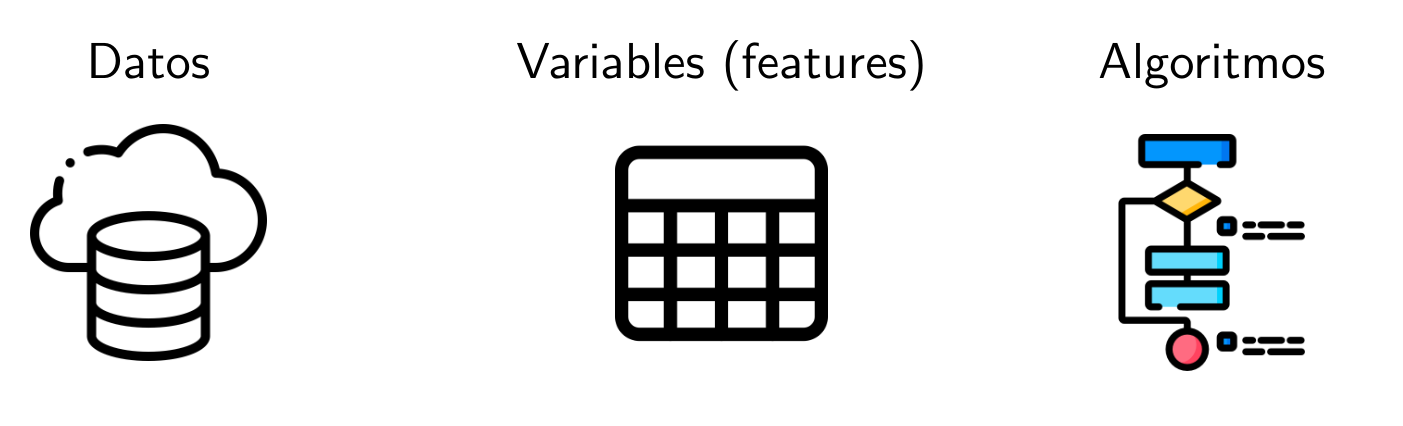

## Contenido de la sesi√≥n

En esta notebook trataremos la parte del preprocesamiento de datos.

    1.   Leyendo la informaci√≥n
    2.   Preprocesamiento de datos



---

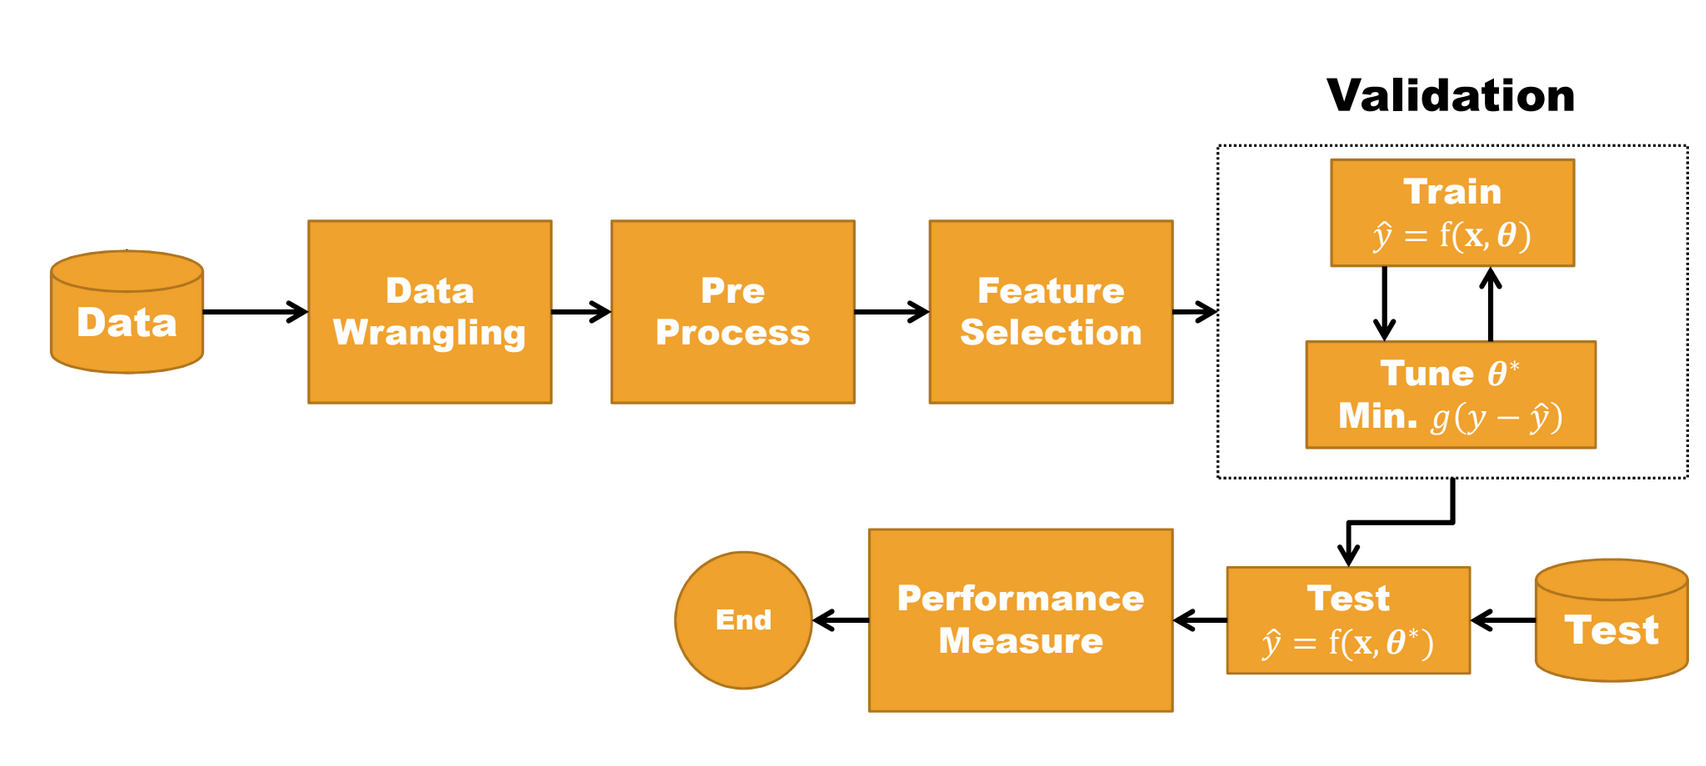

##Scikit-Learn

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Scikit_learn_logo.svg/621px-Scikit_learn_logo.svg.png)

Librer√≠a muy usada para el Machine Learning en Python. Este proyecto fue iniciado en 2007 por David Cournapeau como parte del Google Summer of Code. En 2010, Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort y Vincent Michel, del INRIA, tomaron las riendas del proyecto e hicieron p√∫blica la primera versi√≥n el 1 de febrero de 2010.

La librer√≠a tiene una gran cantidad de algoritmos para muchos prop√≥sitos, desde el pre-procesamiento, el entrenamiento y optimizaci√≥n de modelos, m√©tricas de desempe√±o, funciones de p√©rdida, etc. Las diferentes clases tiene un uso estandarizado e interact√∫an f√°cilmente entre ellas.

Gu√≠a de uso: https://scikit-learn.org/stable/user_guide.html

Documentaci√≥n: https://scikit-learn.org/stable/

In [ ]:
import sklearn

**Referencias**

* Flach, P. A., 2012. Machine Learning : the Art and Science of Algorithms That Make Sense of Data. Cambridge University Press.

* M√ºller, A. C., \& Guido, S., 2016. Introduction to Machine Learning with Python: a Guide for Data Scientists. O'Reilly Media, Inc..

* Garc√≠a, S., Luengo, J., & Herrera, F., 2015. Data preprocessing in data mining (pp. 195-243). Cham, Switzerland: Springer International Publishing.

# Leyendo la informaci√≥n

El **preprocesamiento** de datos dentro de la Ciencia de Datos es FUNDAMENTAL. 

Seg√∫n el Foro Econ√≥mico Mundial, **¬°para 2025 generaremos alrededor de 463 exabytes (463 milliones de TB) de datos a nivel mundial por d√≠a!**. Entonces, deberiamos preguntarnos

*   ¬øtodos los datos son adecuados para ser utilizados por los algoritmos de aprendizaje autom√°tico?
*   ¬øC√≥mo decidimos eso?

El **preprocesamiento** es el primer paso a realizarse antes de comenzar a aprender cualquier tipo de modelo, ya que la calidad de los datos y la informaci√≥n √∫til que puede derivarse de estos afectar√° directamente la capacidad de nuestros modelos.

**Garbage In, Garbage Out**

Cuando hablamos de datos, generalmente pensamos en conjuntos de datos en **forma  tabular o tablas de excel** (filas y columnas) con valores que una computadora es cap√°z de asimilar (n√∫meros continuos) y sin datos faltantes.  

---
### Ejemplo 1: Dataset crediticio


Este dataset contiene instancias de solicitudes de tarjetas de cr√©dito. Todos los nombres y valores de los atributos se han omitido proteger la confidencialidad de los datos.

650 clientes (filas), 15 variables explicativas (nominales/categ√≥ricas y n√∫mericas) as√≠ como una clase (en total 16 columnas).

M√°s informaci√≥n: https://archive.ics.uci.edu/ml/datasets/credit+approval

In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/crx.csv'
df1 = pd.read_csv(url,header=None)

data_table.DataTable(df1, include_index=True, num_rows_per_page=10)


¬øC√≥mo identificar√≠an si una variable, por ejemplo **A4** tiene valores faltantes?

In [ ]:
df1[3].unique()

array(['u', 'y', '?', 'l'], dtype=object)

De acuerdo a la informaci√≥n del dataset, las variables son:

* A1: b, a.
* A2: continuous.
* A3: continuous.
* A4: u, y, l, t.
* A5: g, p, gg.
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
* A7: v, h, bb, j, n, z, dd, ff, o.
* A8: continuous.
* A9: t, f.
* A10: t, f.
* A11: continuous.
* A12: t, f.
* A13: g, p, s.
* A14: continuous.
* A15: continuous.
* A16: +,- (class attribute)

## ¬øQu√© pasa cuando la informaci√≥n no se encuentra en formato de tabla

Si bien mucha informaci√≥n se encuentra en un formato tabular o alg√∫n otro compatible, no siempre es el caso. 

Los datos pueden tener muchas formas diferentes: 
* tablas estructuradas
* im√°genes
* texto
* archivos de audio
* archivos de video

Las m√°quinas no entienden los datos de texto, imagen o video directamente, entienden los 1 y los 0. Por lo tanto, no es suficiente con hacer una presentaci√≥n de diapositivas de todas nuestras im√°genes y esperar que nuestro modelo de aprendizaje autom√°tico se entrene solo con eso.

Veamos un par de ejemplos.


### Ejemplo 1: Im√°genes

¬øC√≥mo podemos representarla para que una modelo entienda una imagen como un conjunto de features o variables independientes?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Leemos el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

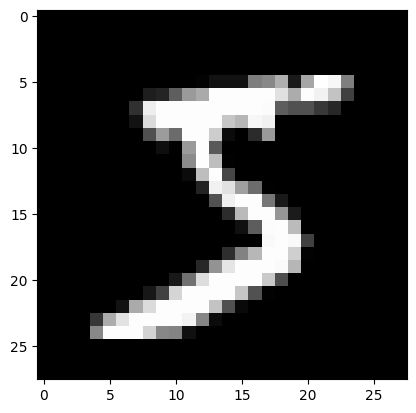

In [ ]:
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Ejemplo 2: Texto

El enfoque m√°s b√°sico para trabajar con texto es la bolsa de palabras (*Bag of words*).

Comenzamos con un conjunto de tres textos

In [ ]:
docs = ['Mirabai has won a silver medal in weight lifting in Tokyo olympics 2021',
                 'Sindhu has won a bronze medal in badminton in Tokyo olympics',
                 'Indian hockey team is in top four team in Tokyo olympics 2021 after 40 years']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
 
# La clase que har√° la bolsa de palabras
vectorizer = CountVectorizer() 

# Construimos la bolsa de palabras
bag = vectorizer.fit_transform(docs)

# Imprimimos las palabras del vocabulario
print(vectorizer.get_feature_names_out())

# Un diccionario con el √≠ndice de cada palabra
print(vectorizer.vocabulary_)

# La matriz de features 
matriz = bag.toarray() 
print(matriz)
print(f"Shape de la matriz {matriz.shape}")

['2021' '40' 'after' 'badminton' 'bronze' 'four' 'has' 'hockey' 'in'
 'indian' 'is' 'lifting' 'medal' 'mirabai' 'olympics' 'silver' 'sindhu'
 'team' 'tokyo' 'top' 'weight' 'won' 'years']
{'mirabai': 13, 'has': 6, 'won': 21, 'silver': 15, 'medal': 12, 'in': 8, 'weight': 20, 'lifting': 11, 'tokyo': 18, 'olympics': 14, '2021': 0, 'sindhu': 16, 'bronze': 4, 'badminton': 3, 'indian': 9, 'hockey': 7, 'team': 17, 'is': 10, 'top': 19, 'four': 5, 'after': 2, '40': 1, 'years': 22}
[[1 0 0 0 0 0 1 0 2 0 0 1 1 1 1 1 0 0 1 0 1 1 0]
 [0 0 0 1 1 0 1 0 2 0 0 0 1 0 1 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 1 0 1 2 1 1 0 0 0 1 0 0 2 1 1 0 0 1]]
Shape de la matriz (3, 23)


‚≠ï Prueba con algunos textos escritos por t√≠. ¬øQu√© pasa con las stopwords eliminadas en espa√±ol? ¬øDistingue may√∫sculas y min√∫sculas?

# Preprocesamiento de datos

En cualquier proceso de Machine Learning, el preprocesamiento (PP) es el paso en el que los datos se transforman o codifican para llevarlos a un estado tal que ahora la m√°quina pueda analizarlos f√°cilmente. 

Estos son algunos de los tipos de problemas b√°sicos as√≠ como la familia de t√©cnicas de PP a la que pertenecen:
* ¬øC√≥mo limpio los datos? ***Limpieza de datos***.
* ¬øC√≥mo unifico y escalo los datos? ***Normalizaci√≥n de datos***.
* ¬øC√≥mo proporciono datos precisos? ***Transformaci√≥n de datos***.
* ¬øC√≥mo manejo los datos faltantes? ***Imputaci√≥n de datos perdidos***.
* ¬øC√≥mo incorporo y ajusto datos? ***Integraci√≥n de datos***.
* ¬øC√≥mo detecto y manejo el ruido? ***An√°lisis del ruido***.

![](https://docs.google.com/uc?export=download&id=1-Dro_Qk1I63w2OAtjrFXRN2HcXMC07lo)




## Limpieza de Datos

Involucra operaciones como
* **Correcci√≥n** de datos 
* **Filtrar datos** especificios o incorrectos 
* **Reducir detalles** innecesarios. 

Algunas veces se traslapa con otras t√©cnicas de PP como la imputaci√≥n de datos faltantes y an√°lisis del ruido (aunque ambas categor√≠as se ven por separado para un an√°lisis m√°s profundo).

Otras operaciones son la **detecci√≥n de discrepancias** y **datos sucios** (fragmentos de los datos originales que no tienen sentido). 

Esto t√≠picamente requiere intervenci√≥n humana ya que es necesaria la comprensi√≥n de los datos originales.

Continuamos con el ejemplo de la aprobaci√≥n de cr√©ditos que comenzamos arriba al inicio de la notebook

In [1]:
import pandas as pd
from google.colab import data_table

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/crx.csv'
df = pd.read_csv(url,header=None)
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

Cambiamos los nombres de las columnas para hacerlos coincidir con los datos originales del dataset.

In [2]:
mapping_dict = {j:'A'+str(j+1) for j in range(16)}
mapping_dict[15] = 'class'

df.rename(columns=mapping_dict, inplace=True)
df

A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15  \
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202    0   
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043  560   
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280  824   
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100    3   
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120    0   
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...   
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  00260    0   
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200  394   
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  00200    1   
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  00280  750   
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g  00000    0   

    class  
0       +  
1       +  
2       +  
3       +  
4       +  
..    ...  
685     -  
686     -  
687     -  
688     -  
689     -  

[690 rows x 16 columns]

Conservaremos el dataframe original en la variable `df`

üîµ Ejercicio:

1. Ahora queremos remover (por alguna raz√≥n) los registros de la matriz donde la variable A4 == 'u' (reducir detalles no necesarios).

2. Tambi√©n podriamos querer acotarnos a un rango de valores, por ejemplo para la
variable 'A3' entre 4 y 10 (filtrar datos espec√≠ficos).

3. En particular, queremos cambiar el valor de la columna ``class`` de $\{-,+\}$ a $\{-1,1\}$ (correcci√≥n de datos).

Tarea 1. Remover los registros de la matriz donde la variable `A4` == 'u'.

Dos maneras de hacerlo:

In [ ]:
df_limpio_2 = df[df['A4']!='u'].copy()
df_limpio_2

In [ ]:
df[df['A4']=='u']
df_limpio = df.drop(index=df[df['A4']=='u'].index.tolist())
df_limpio

Tarea 2:  Acotar a un rango de valores, la variable 'A3' debe de estar entre 4 y 10.

In [ ]:
df_limpio = df_limpio[(df_limpio['A3']<=10)&(df_limpio['A3']>=4)]
print(df_limpio.shape)
df_limpio

Tarea 3: Cambiar el valor de la columna class de $\{‚àí,+\}$ a $\{‚àí1,1\}$. Dos maneras:

In [ ]:
# ---- Manera 1 ----

# def modificar_class(x):
#     modificado = 1
#     if x=='-':
#         modificado = -1
#     return modificado 
# df_limpio['class'] = df_limpio['class'].apply(modificar_class)

# ---- Manera 2 ----
df_limpio.replace({"+":1, "-": -1}, inplace=True)

print(df_limpio.shape)
df_limpio

Una vez que hemos terminos de descartar algunos datos podemos resetear el √≠ndice.

In [ ]:
df_limpio.reset_index(inplace=True,drop=True)
df_limpio

‚≠ï Ejercicio:

¬øHay valores faltantes en alguna columna? En caso de que s√≠ lo haya, eliminaremos dichas columnas. Al final, resetear el √≠ndice.

## Imputaci√≥n de datos faltantes.

Por diversas razones, muchos conjuntos de datos del mundo real contienen valores perdidos. Sin embargo, estos conjuntos de datos son incompatibles con los estimadores de scikit-learn, que asumen que todos los valores de una matriz son num√©ricos. 

T√≠picamente los valores faltantes est√°n indicados como [numpy.nan](https://numpy.org/doc/stable/reference/constants.html#numpy.nan).

Hay varias estrategias para imputar valores faltantes:

* Descartar filas y/o columnas enteras que contengan valores perdidos. Sin embargo, esto tiene el precio de perder datos que pueden ser valiosos (aunque est√©n incompletos). 
* Imputar los valores que faltan, es decir, deducirlos de la parte conocida de los datos. Por ejemplo:
    * Usar el promedio.
    * Usar la mediana.
    * Usar la moda (el valor m√°s frecuente).
    * Usar alg√∫n valor constante.

En la mayor√≠a de los casos, es mejor agregar una estimaci√≥n razonable de un valor de datos adecuado que dejarlo en blanco.

Hay algunos patrones que se pueden presentar en los datos faltantes. Diferentes patrones pueden ser tratados con diferentes estrategias m√°s especializadas.

<img src="https://stefvanbuuren.name/fimd/fig/ch04-patterns-1.png" width="700">

https://stefvanbuuren.name/fimd/missing-data-pattern.html




**¬øC√≥mo exploramos los valores faltantes?**

Trabajaremos con la versi√≥n original del dataframe `df`. Exploremos, por ejemplo, los datos faltantes en la columna `A2`

In [ ]:
# Podemos ver las filas del dataframe que tienen valores faltantes en la columna A3:
display(df[df['A2'].isnull()])

# Podemos contar las filas del dataframe que tienen valores faltantes en la columna A3:
print(f"Cantidad de entradas nulas: {df[df['A2'].isnull()].shape[0]}")

Empty DataFrame
Columns: [A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, A15, class]
Index: []

Cantidad de entradas nulas: 0


Veamos los valores √∫nicos de la columna

In [ ]:
df['A2'].unique()

In [ ]:
df.describe()

La informaci√≥n del dataset dice que las columnas `A2`, `A3`, `A8`, `A11`, `A14`, `A15` son continuas, sin embargo, la tabla anterior nos dice otra cosa.

![](https://pbpython.com/images/pandas_dtypes.png)

Exploremos los tipos de cada columna

In [ ]:
# Ver los tipos de datos de cada columna
df.dtypes

Cambiemos el tipo de las columnas `A2` y `A14`.

In [ ]:
import numpy as np

# Podr√≠amos convertir el tipo as√≠: 
# df2 = df.copy()
# df2['A2'].astype('float')

def cambiar_tipo(x):
    try:
        return float(x)
    except:
        return np.nan

# Aplicamos la funci√≥n en cada columna que presenta el problema 
columnas = ['A2','A14']
for columna in columnas:
    df[columna] = df[columna].apply(cambiar_tipo)
df

Veamos c√≥mo quedaron los tipos de las variables

In [ ]:
df.dtypes

¬øCu√°ntos valores faltantes tiene la columna `A2`?

In [ ]:
df[df['A2'].isnull()].shape[0]

Veamos c√≥mo se ven esos renglones

In [ ]:
df[df['A2'].isnull()]

Hagamos la imputaci√≥n de valores faltantes en la columna `A2`. Para esto usaremos scikit-learn, el cual tiene un [subm√≥dulo](https://scikit-learn.org/stable/modules/impute.html) para hacer imputaci√≥n.

In [ ]:
from sklearn.impute import SimpleImputer

A2_values = df['A2'].values

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
A2_new_values = imp.fit_transform(A2_values.reshape(-1,1))
A2_new_values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(A2_values)
plt.axvline(x=np.nanmean(A2_values))
plt.subplot(1,2,2)
sns.histplot(A2_new_values)
plt.axvline(x=np.mean(A2_new_values))
plt.show()

¬øC√≥mo son ambos promedios?

In [ ]:
np.nanmean(A2_values),np.mean(A2_new_values)

‚ùì ¬øPor qu√© son iguales?

Regresemos la nueva columna al dataframe original

In [ ]:
df['A2'] = A2_new_values.reshape(-1,)
df

Comprobemos que ya no hay entradas faltantes en esa columna

In [ ]:
df[df['A2'].isnull()]

Tambi√©n funciona para valores categ√≥ricos, aunque s√≥lo en las estrategias `most_frequent` y `constant`. Veamos la columna `A4`.

In [ ]:
df['A4'].unique()

In [ ]:
sns.countplot(x=df['A4'])
plt.show()

In [12]:
imp_categorico = SimpleImputer(missing_values='?', strategy='most_frequent')
A4_new_values = imp_categorico.fit_transform(df['A4'].values.reshape(-1,1))

‚≠ï Regresa la nueva columna al dataframe original, comprueba que ya no hay valores faltantes.

## Normalizaci√≥n de los Datos (re-escalamiento).

La unidad de medida utilizada puede afectar el an√°lisis de datos.

>> Por ejemplo: t√≠picamente los datos atmosf√©ricos en Cuernavaca, reflejan una  temperatura acotada entre 8 a 40 ¬∞C, mientras que la presi√≥n atmosf√©rica esta data entre 950 a 1050 mbar.  
>> * ¬øQu√© variable predomina m√°s? 
>> * ¬øQu√© cambio produce un mayor efecto, una diferencia de 5¬∞C de temperatura o 5 mbar de presi√≥n?

**La normalizaci√≥n de los datos intenta dar a todos los atributos el mismo peso, expresando cada variable en las mismas unidades de medida y as√≠ como una escala en com√∫n (determinada).**

Se trata de re-escalar el intervalo en el que se encuentran los datos al intervalo $[0,1]$ (o cualquier otro).

üîµ Ejercicio:

1. Escalar los valores de las columnas A3 y A15 entre 0 y 1.

Utilice la siguiente formula:

$$x_{new} = \frac{x-a}{b-a}$$

tal que

$$a=\min(x),\ b=\max(x)$$

2. Escalar las mismas columnas pero entre dos valores arbitrarios $q$ y $z$, tal que $q<z$.

Utilice la siguiente formula:

$$x_{qz}= (z-q)\cdot x_{new}+q$$


Una de las ra√≠ces de las dificultades que se presentan al tener escalas de valores muy diferentes es el **error de absorci√≥n**:

In [ ]:
eps = 0.0000000000001
x0 = 100000
num_iteraciones = 10000

for k in range(num_iteraciones):
    x0 += eps 
print(f"Estrategia 1: {x0}")

x_final = x0 + num_iteraciones*eps
print(f"Estrategia 2: {x_final}")

Continuamos con la normalizaci√≥n de datos

In [ ]:
a3 = df_limpio['A3'].min()
b3 = df_limpio['A3'].max()
print(f"El m√°ximo y m√≠nimo de la columna 'A3': {b3,a3}")
a15 = df_limpio['A15'].min()
b15 = df_limpio['A15'].max()
print(f"El m√°ximo y m√≠nimo de la columna 'A15': {b15,a15}")

df_limpio['A3'] = df_limpio['A3'].apply(lambda x: (x-a3)/(b3-a3))
df_limpio['A15'] = df_limpio['A15'].apply(lambda x: (x-a15)/(b15-a15))
df_limpio

Usando el m√≥dulo ``preprocessing`` de Scikit-Learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(df_limpio[['A3','A8']])
datos_normalizados

In [ ]:
df_limpio.loc[:,['A3','A8']] = datos_normalizados
df_limpio

‚≠ï Ejercicio. 

Aplica esta normalizaci√≥n a todos las columnas de datos y muestra el dataframe con los datos normalizados. **Ten cuidado con posibles datos faltantes**

## Transformaci√≥n de Datos

En este paso los datos se **convierten o consolidan** para que el resultado del modelado sea m√°s *eficiente/efectivo*. 

Entre las t√©cnicas de transformaci√≥n de datos se encuentra
* el **suavizamiento**.
* **construcci√≥n de caracter√≠sticas**.
* **agregaci√≥n o resumen** de datos.
* **discretizaci√≥n**.
* **generalizaci√≥n**. 

Sin embargo, la mayor√≠a de estas se pueden considerar como √°reas independientes.

Las tareas que requieren supervisi√≥n humana son las t√©cnicas cl√°sicas de transformaci√≥n de datos como: 
* la generaci√≥n de informes
* nuevos atributos que agregan los existentes 
* generalizaci√≥n de conceptos, especialmente en atributos categ√≥ricos (por ejemplo, la sustituci√≥n de fechas completas por solo n√∫meros de a√±o).

üîµ Ejercicio: One-Hot Encoding

One-Hot Encoding es la transformaci√≥n de variables nominales/categ√≥ricas en n√∫mericas. Esta transformaci√≥n consiste en convertir cada valor $v_i$ de una variable $V$ ($v_i\in V$), en columnas. De tal suerte, que si la variable $V$ tiene tres valores ($|V|=3$), esta ser√° reemplazada por V1, V2 y V3, en donde se pondr√° un 1 si $V1 = v_i$, de otra forma 0; se aplica el mismo principio para V2 y V3.

![](https://docs.google.com/uc?export=download&id=18CttdKmICOmEvQ82JEJwQbdnxO3myjnU)


**Actividad**: Aplicar el One-Hot-Encoding a las variables A4 y A5 del conjunto de aprobaci√≥n de cr√©dito.

¬øQu√© valores toman las variables categ√≥ricas

In [ ]:
df['A4'].unique()

Creamos las columnas con *one-hot encoding*

In [ ]:
cat_columns = ['A4','A5']
df_proc = pd.get_dummies(df,prefix='category',prefix_sep='_',columns=cat_columns)
df_proc.sample(10)

## Integraci√≥n de Datos.

Comprende la fusi√≥n de datos de m√∫ltiples fuentes de datos. 

Este proceso debe realizarse con cuidado para evitar redundancias e inconsistencias en el conjunto de datos resultante. 

Las operaciones t√≠picas logradas dentro de la integraci√≥n de datos son la 
* **identificaci√≥n** y **unificaci√≥n** de variables y dominios
* **an√°lisis de correlaci√≥n** entre atributos
* **identificaci√≥n de duplicaci√≥n** y **detecci√≥n de conflictos** en los valores de datos de diferentes fuentes.

## Identificaci√≥n de Datos An√≥malos/Outliers.

El objetivo principal es detectar errores aleatorios o variaciones en una variable medida. Tenga en cuenta que nos referimos a este proceso como  **identificaci√≥n** de ruido en lugar de la **eliminaci√≥n** de ruido. 

<img src="https://www.mdpi.com/energies/energies-12-03310/article_deploy/html/images/energies-12-03310-g002.png" width="600">

Una vez que se detecta un ejemplo ruidoso, podemos aplicar un proceso basado en la correcci√≥n que podr√≠a involucrar alg√∫n tipo de operaci√≥n subyacente.

<img src="https://anomaly.io/wp-content/uploads/2017/01/correlation-anomaly-detected.png" width="800" align="middle">

---


## Reducci√≥n de Datos

La **reducci√≥n de datos** comprende el conjunto de t√©cnicas que, de una forma u otra, obtienen una representaci√≥n reducida de los datos originales.

El **objetivo** de la reduci√≥n de los datos es ***encontrar un sub-conjunto $C'$ tal que se aproxime al conjunto original $C$ tal que la informaci√≥n contenida en $C' \approx C$***. Esto t√≠picamente significa que se mantienen la estructura esencial de los datos originales ($C$), pero la cantidad de datos se reduce. 

![](https://docs.google.com/uc?export=download&id=1kJvqifJpTjT-3NjyUzdD-6EvYGPSHE3v)

Algo interesante, es que mientras el PP es fundamental, la reducci√≥n de datos puede considerarse como *opcional*. Sin embargo, existen muchas razones por las cuales este proceso es m√°s que una sugerencia:

* Para su ejecuci√≥n y de acuerdo a formulaci√≥n, todos los algoritmos de ML estan sujetos a un 
  * **tiempo de computo espec√≠fico** 
  * **memoria** espec√≠fica.
  * **tama√±o del conjunto de datos** 

  Entonces, si el tama√±o del conjunto de datos es mayor al limite de un algoritmo, el tiempo de computo se volver√° **prohibitivo**.  




Feature Selection: Son las t√©cnicas para elegir ciertas variables que mejor representen a un conjunto de datos. Podemos considerarla como una t√©cnica de reducci√≥n de dimensionalidad.

* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) selecciona las mejores $k$ variables de acuerdo a alguna prueba estad√≠stica.
* [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) elimina variable con una varianza baja. Esto no se combina bien con la normalizaci√≥n.

En el siguiente ejemplo, descartamos la tercera coordenada:

$$(x,y,z)\mapsto (x,y)$$

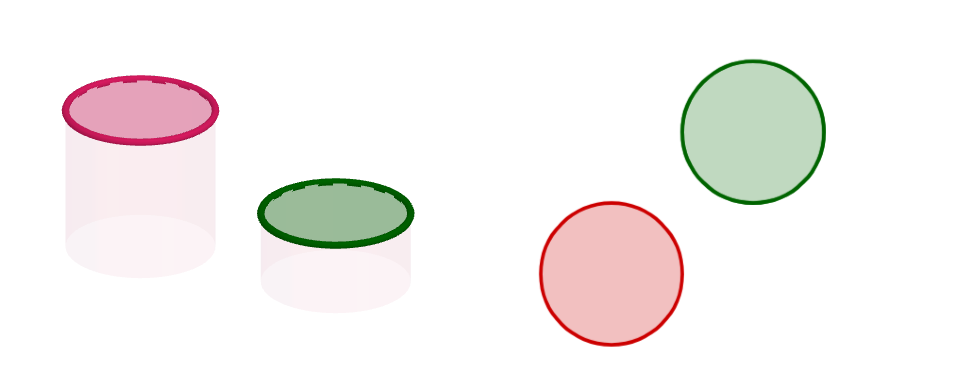

Respecto a la **memoria** y **tama√±o del conjunto de datos**, estos se encuentra relacionados a la **Maldici√≥n de la Dimensionalidad** (Curse of Dimensionality en ingl√©s).
La maldici√≥n de la dimensionalidad es una familia de fen√≥menos relacionados a aquellos problemas descritos por muchas dimensiones, lo que no sucede en aquellos sistemas de pocas dimensiones. 

**Alta Dimensionalidad**

***Espacio de Caracter√≠sticas*** (Feature Space en ingl√©s); determina todo el posible conjunto de combinaciones (realistas o no) de los valores que tendr√°n las variables del problema.

Ahora supongamos que queremos realizar una predicci√≥n usando solo una dimensi√≥n que esta acotada entre 0 y 1, $X^D \mid D=1,\ 0\leq x_1 \leq 1$. En este caso, podemos conocer $1/3$ de todos los posibles resultados conociendo una tercera parte de la variable $x_1$, como se observa en la siguiente figura  
![](https://docs.google.com/uc?export=download&id=1DCqkNuAH2Dc32HOz04aBBekn8nAk1zHH)
        
Si ahora utilizamos dos variables, $X^D \mid D=2, 0\leq x_1,\ x_2 \leq 1$, y dividimos ambas en 3 partes, podemos dibujar un cuadrado que cubra $1/3$ de los valores de cada variable en 3 partes. Sin embargo, este cuadrado, no cubre $1/3$ parte de todas las combinaciones de $x_1 \text{ y } x_2$, en cambio, ¬°solo cubre $1/9 \approx 11 \text{%}$! 
![](https://docs.google.com/uc?export=download&id=18wZ8GWiQNYnZMGvIKyAvSqyT1dfDE_lK)

Si a√±adimos una tercer variable y repetimos el mismo proceso, el cubo resultante solo cubrir√° $1/27 \approx 4\text{\%}$ de todas las posibles combinaciones.        
![](https://docs.google.com/uc?export=download&id=1rBP3TXW2SjowCslJOEa9SN0RlOdwir90)

De hecho

<img src="https://docs.google.com/uc?export=download&id=18hw5NcUSEKAZw9VJkZzH5-AjqcYWgl2L" width="600" style="background-color:white;">




# ‚≠ï Pr√°ctica: Dateset PIMA

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. **Missing values are believed to be encoded with zero values**. The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)^2).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).

M√°s informaci√≥n: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url,header=None)

df

‚≠ï Ejercicio 1

* Modificar el nombre de las columnas de acuerdo a la informaci√≥n anterior.

* Hacer un an√°lisis exploratorio:
    * ¬øQu√© tipo de variable es cada columna?
    * ¬øHay datos faltantes en alguna columna? Toma en cuenta la informaci√≥n del dataset y auxiliate de histogramas y otras herramientas exploratorias.
    * ¬øQu√© variable tiene m√°s datos faltantes?
    * ¬øQu√© rango tienen los datos en cada columna?

‚≠ï Ejercicio 2

Realizar las siguientes tareas de preprocesamiento:

* Para lididar con los valores faltantes hay dos opciones: Eliminar los renglones con valores faltantes o imputarlos. ¬øCu√°l eliges y por qu√©? Realiza esta tarea en todas las columnas.
* Filtrar los valores del BMI en alg√∫n rango de tu elecci√≥n.
* Normalizar todos los valores continuos.
* Cambiar las variables categ√≥ricas por *one-hot*